In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib.style.use('ggplot')
%matplotlib inline

In [26]:
plt.style.use('ggplot')

In [2]:
restuarant_data = pd.read_csv('https://data.cityofnewyork.us/api/views/xx67-kt59/rows.csv?accessType=DOWNLOAD')

In [3]:
restuarant_data.head(3)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,41381287,SINGAS FAMOUS PIZZA,QUEENS,26021,HILLSIDE AVENUE,11004.0,7183474300,Pizza,01/17/2017,Violations were cited in the following area(s).,10E,Accurate thermometer not provided in refrigera...,Not Critical,12.0,A,01/17/2017,11/15/2017,Cycle Inspection / Initial Inspection
1,41601611,LEFT BANK,MANHATTAN,117,PERRY STREET,10014.0,2127271170,American,04/15/2014,Violations were cited in the following area(s).,10E,Accurate thermometer not provided in refrigera...,Not Critical,30.0,NaN,NaN,11/15/2017,Cycle Inspection / Initial Inspection
2,50003131,CHATIME,MANHATTAN,858,LEXINGTON AVENUE,10065.0,2129888878,CafÃ©/Coffee/Tea,07/13/2016,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,34.0,NaN,NaN,11/15/2017,Cycle Inspection / Initial Inspection


In [4]:
restuarant_data = restuarant_data[(restuarant_data['GRADE'] == 'A') | (restuarant_data['GRADE'] == 'B')| 
                                  (restuarant_data['GRADE'] == 'C')]

#### Removing missing data rows

In [5]:
restuarant_data = restuarant_data[(restuarant_data['CRITICAL FLAG'] != 'Not Applicable')]

In [6]:
restuarant_data = restuarant_data[(restuarant_data['BORO'] != 'Missing')]

In [9]:
res_grade = restuarant_data.groupby(['BORO','GRADE']).size().unstack()

In [76]:
res_violation = restuarant_data.groupby(['BORO','CRITICAL FLAG']).size().unstack()

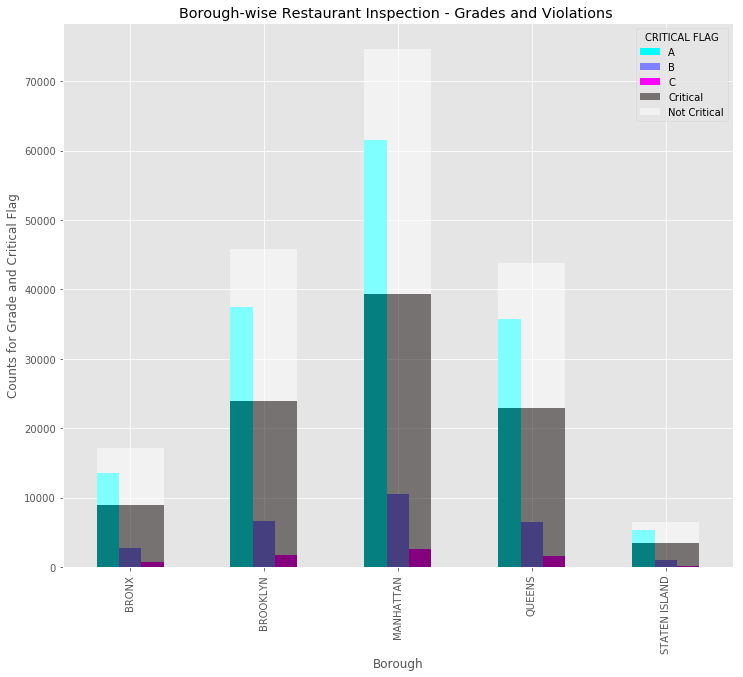

In [81]:
fig, ax1 = plt.subplots(figsize=(12,10))
restuarant_data.groupby(['BORO','GRADE']).size().unstack().plot(kind='bar',ax=ax1, colormap='cool')
res_violation[['Critical','Not Critical']].plot.bar(ax=ax1,stacked=True,alpha=0.5,colormap='hot')
ax1.set_xlabel('Borough')
ax1.set_ylabel('Counts for Grade and Critical Flag')
ax1.set_title('Borough-wise Restaurant Inspection - Grades and Violations ')

#### Figure 1: Above figure is an analysis of Restaurant Inspection Results where Borough is shown on x-axis
#### and y-axis has counts of various different types of Grades (A,B,C) and level of violations(Critical, Not Critical).